<a href="https://colab.research.google.com/github/sumitkushwaha2572/Assignment-123/blob/main/India_Primary_healthcare_based_on_Geographic_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Modules**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving rural-area-covered-centre_2017.csv to rural-area-covered-centre_2017.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving rural-population-centre_2017.csv to rural-population-centre_2017.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving villg-coveredby-centre_2017.csv to villg-coveredby-centre_2017.csv


## **Step 1: Load Data**

In [ ]:
# Load Data
area_df = pd.read_csv('rural-area-covered-centre_2017.csv')
pop_df = pd.read_csv('rural-population-centre_2017.csv')
village_df = pd.read_csv('villg-coveredby-centre_2017.csv')

In [ ]:
area_df.info()
pop_df.info()
village_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 8 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   S. No.                                                 37 non-null     object 
 1   State/ UT                                              37 non-null     object 
 2   Average Rural Area [Sq. Km.] covered by a sub Centre   36 non-null     float64
 3   Average Rural Area [Sq. Km.] covered by a PHC          36 non-null     float64
 4   Average Rural Area [Sq. Km.] covered by a CHC          35 non-null     float64
 5   Average Radial Distance [Kms] covered by a sub Centre  36 non-null     float64
 6   Average Radial Distance [Kms] covered by a PHC         36 non-null     float64
 7   Average Radial Distance [Kms] covered by a CHC         35 non-null     float64
dtypes: float64(6), object(2)
memory usage: 2.4+ KB
<class

In [ ]:
area_df.head()
pop_df.head()
village_df.head()

,S. No.,State/ UT,Average Number of Villages covered by a sub Centre,Average Number of Villages covered by a PHC,Average Number of Villages covered by a CHC,Number of Sub Centres per PHC,Number of PHCs per CHC
0,1,Andhra Pradesh,2,15,88.0,7,6.0
1,2,Arunachal Pradesh,18,39,89.0,2,2.0
2,3,Assam,6,26,167.0,5,6.0
3,4,Bihar,5,24,299.0,5,13.0
4,5,Chhattisgarh,4,26,119.0,7,5.0


## **Step 2: EDA**

In [ ]:
# Step 2: Clean Columns
def clean_df(df):
    df.columns = df.columns.str.strip().str.replace('\n', ' ').str.replace('\r', '').str.replace(' +', ' ', regex=True)
    df = df.drop(columns=['S. No.'])
    df['State/ UT'] = df['State/ UT'].str.strip()
    return df

area_df = clean_df(area_df)
pop_df = clean_df(pop_df)
village_df = clean_df(village_df)

In [ ]:
# Step 3: Merge DataFrames
merged_df = area_df.merge(pop_df, on='State/ UT', how='outer')
merged_df = merged_df.merge(village_df, on='State/ UT', how='outer')

In [ ]:
merged_df.head()

,State/ UT,Average Rural Area [Sq. Km.] covered by a sub Centre,Average Rural Area [Sq. Km.] covered by a PHC,Average Rural Area [Sq. Km.] covered by a CHC,Average Radial Distance [Kms] covered by a sub Centre,Average Radial Distance [Kms] covered by a PHC,Average Radial Distance [Kms] covered by a CHC,Average Rural Population [Census 2011] covered by a Sub Centre,Average Rural Population [Census 2011] covered by a PHC,Average Rural Population [Census 2011] covered by a CHC,Average Number of Villages covered by a sub Centre,Average Number of Villages covered by a PHC,Average Number of Villages covered by a CHC,Number of Sub Centres per PHC,Number of PHCs per CHC
0,A & N Island,5.23,29.24,160.82,1.29,3.05,7.15,1928,10777,59273.0,5,25,139.0,6,6.0
1,All India,18.90,115.15,525.17,2.45,6.05,12.93,5337,32505,148248.0,4,25,114.0,6,5.0
2,Andhra Pradesh,21.30,138.50,823.09,2.60,6.64,16.18,4663,30319,180189.0,2,15,88.0,7,6.0
3,Arunachal Pradesh,NaN,NaN,NaN,NaN,NaN,NaN,3418,7457,16926.0,18,39,89.0,2,2.0
4,Assam,6.84,31.17,200.02,1.48,3.15,7.98,5801,26437,169665.0,6,26,167.0,5,6.0


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 15 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   State/ UT                                                       37 non-null     object 
 1   Average Rural Area [Sq. Km.] covered by a sub Centre            36 non-null     float64
 2   Average Rural Area [Sq. Km.] covered by a PHC                   36 non-null     float64
 3   Average Rural Area [Sq. Km.] covered by a CHC                   35 non-null     float64
 4   Average Radial Distance [Kms] covered by a sub Centre           36 non-null     float64
 5   Average Radial Distance [Kms] covered by a PHC                  36 non-null     float64
 6   Average Radial Distance [Kms] covered by a CHC                  35 non-null     float64
 7   Average Rural Population [Census 2011] covered by a Sub

In [ ]:
# Check where nulls are present
merged_df.isnull().sum()

,0
State/ UT,0
Average Rural Area [Sq. Km.] covered by a sub Centre,1
Average Rural Area [Sq. Km.] covered by a PHC,1
Average Rural Area [Sq. Km.] covered by a CHC,2
Average Radial Distance [Kms] covered by a sub Centre,1
Average Radial Distance [Kms] covered by a PHC,1
Average Radial Distance [Kms] covered by a CHC,2
Average Rural Population [Census 2011] covered by a Sub Centre,0
Average Rural Population [Census 2011] covered by a PHC,0
Average Rural Population [Census 2011] covered by a CHC,1


In [ ]:
# --- Step 4: Convert Numeric Columns ---
for col in merged_df.columns[1:]:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

In [ ]:
# --- Step 5: Drop NaNs for Clustering ---
analysis_df = merged_df.dropna().copy()
states = analysis_df['State/ UT']
features = analysis_df.drop(columns=['State/ UT'])

# **STEP 3: Segment the Market**

### **1. Demographic & Firmographic Segmentation**

In [ ]:
demo_cols = [
    "State/ UT",
    "Average Rural Population [Census 2011] covered by a Sub Centre",
    "Average Number of Villages covered by a sub Centre",
    "Cluster"
]
print("\n--- Demographic & Firmographic Segmentation ---")
print(analysis_df[demo_cols].sort_values(by=demo_cols[1], ascending=False).head())


--- Demographic & Firmographic Segmentation ---
        State/ UT  \
5           Bihar   
34  Uttar Pradesh   
16      Jharkhand   
13        Haryana   
36    West Bengal   

    Average Rural Population [Census 2011] covered by a Sub Centre  \
5                                                9281                
34                                               7569                
16                                               6511                
13                                               6377                
36                                               5997                

    Average Number of Villages covered by a sub Centre  Cluster  
5                                                   5         1  
34                                                  5         1  
16                                                  8         3  
13                                                  3         1  
36                                                  4         1  


In [ ]:
# Convert columns to numeric where appropriate
for col in analysis_df.columns[1:]:
    analysis_df[col] = pd.to_numeric(analysis_df[col].astype(str).str.strip(), errors='coerce')

# Set plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Helper function for plotting
def barplot(data, x_col, y_col, title, top_n=10):
    data_sorted = data.sort_values(by=y_col, ascending=False).head(top_n)
    sns.barplot(x=y_col, y=x_col, data=data_sorted, palette="viridis")
    plt.title(title)
    plt.xlabel(y_col)
    plt.ylabel("")
    plt.tight_layout()
    plt.show()

Demographic & Firmographic Segmentation


<ipython-input-24-0f401f7f8a2b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_col, y=x_col, data=data_sorted, palette="viridis")


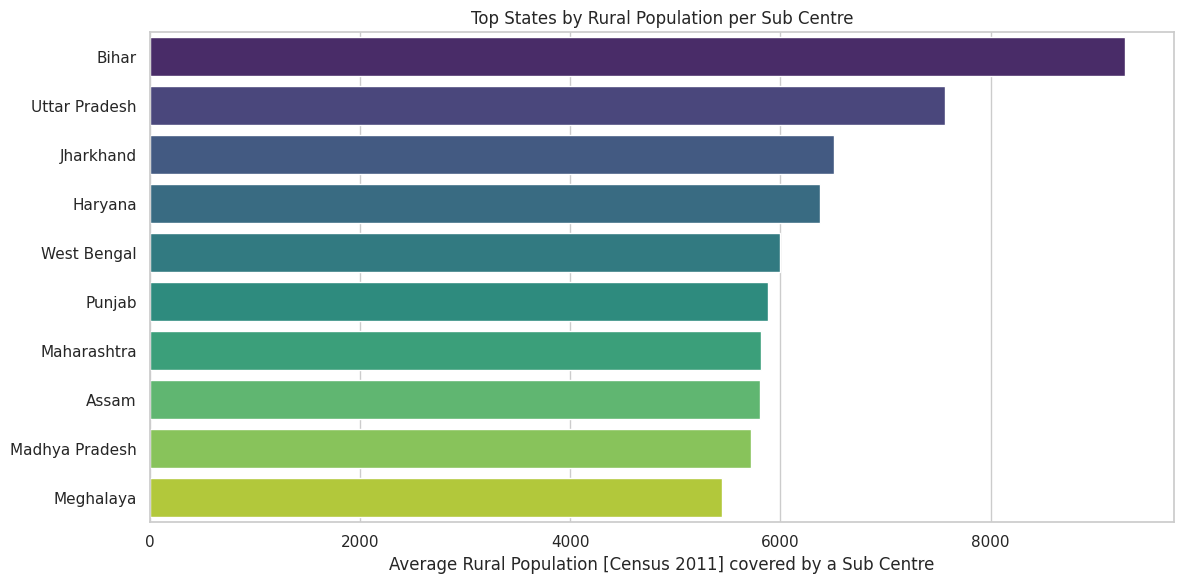

<ipython-input-24-0f401f7f8a2b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_col, y=x_col, data=data_sorted, palette="viridis")


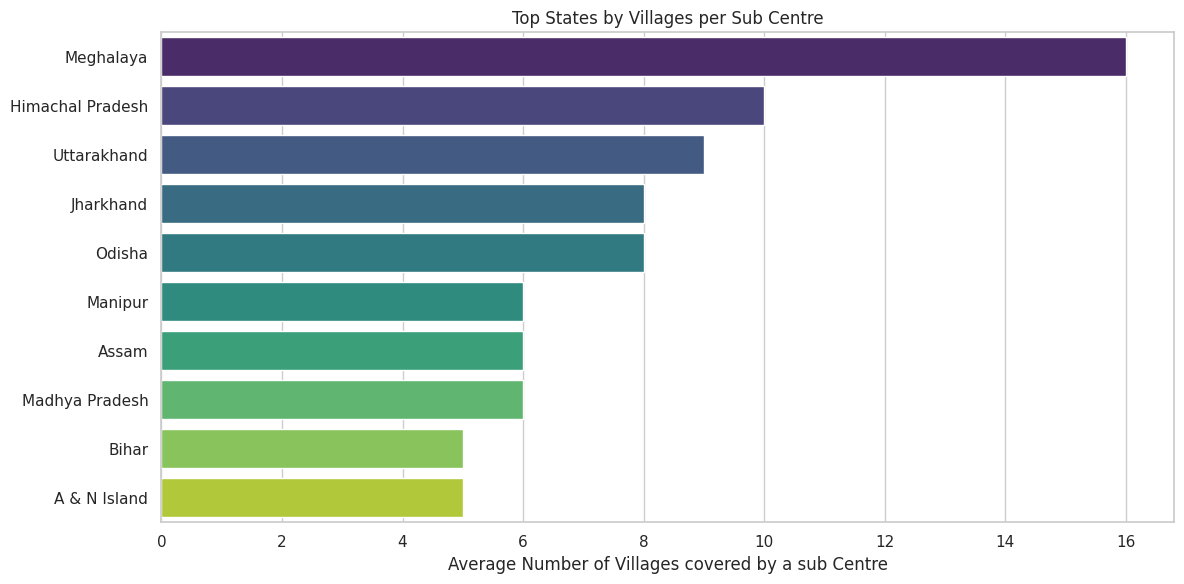

In [ ]:
# barplot
print("Demographic & Firmographic Segmentation")
barplot(analysis_df, "State/ UT",
        "Average Rural Population [Census 2011] covered by a Sub Centre",
        "Top States by Rural Population per Sub Centre")

barplot(analysis_df, "State/ UT",
        "Average Number of Villages covered by a sub Centre",
        "Top States by Villages per Sub Centre")



### ***2. Service & Role-Based Segmentation ***

In [ ]:
service_cols = [
    "State/ UT",
    "Number of Sub Centres per PHC",
    "Number of PHCs per CHC",
    "Average Number of Villages covered by a PHC",
    "Average Number of Villages covered by a CHC"
]
print("\n--- Service & Role-Based Segmentation ---")
print(analysis_df[service_cols].sort_values(by="Number of PHCs per CHC", ascending=False).head())


--- Service & Role-Based Segmentation ---
          State/ UT  Number of Sub Centres per PHC  Number of PHCs per CHC  \
5             Bihar                              5                    13.0   
30           Sikkim                              6                    12.0   
17        Karnataka                              4                    11.0   
27       Puducherry                              2                    10.0   
15  Jammu & Kashmir                              5                     8.0   

    Average Number of Villages covered by a PHC  \
5                                            24   
30                                           19   
17                                           12   
27                                            2   
15                                           10   

    Average Number of Villages covered by a CHC  
5                                         299.0  
30                                        226.0  
17                             

Service & Role-Based Segmentation


<ipython-input-24-0f401f7f8a2b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_col, y=x_col, data=data_sorted, palette="viridis")


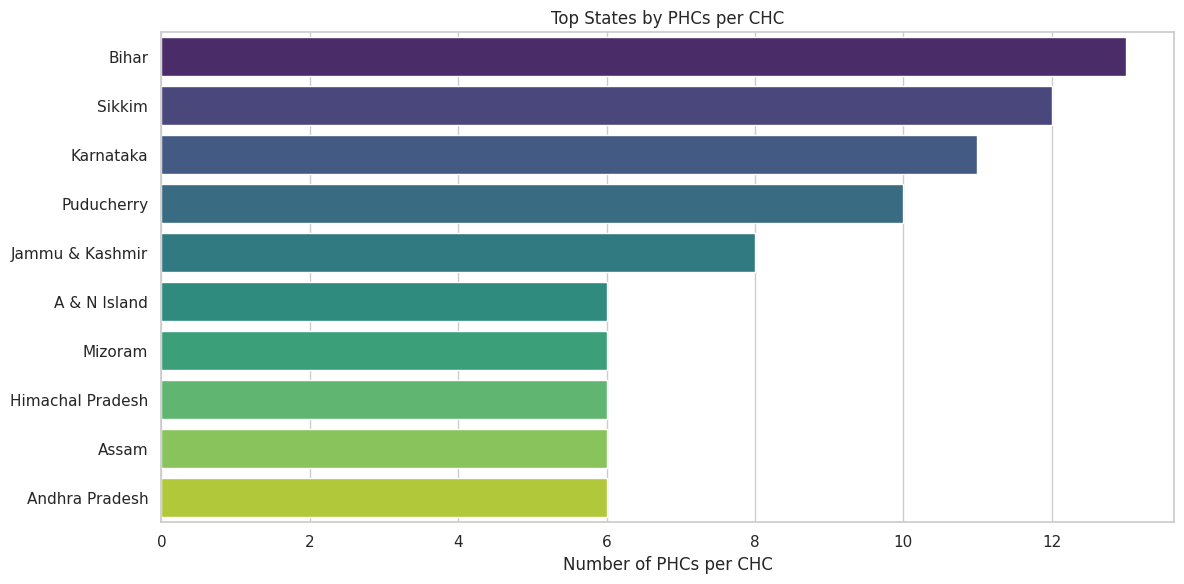

<ipython-input-24-0f401f7f8a2b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_col, y=x_col, data=data_sorted, palette="viridis")


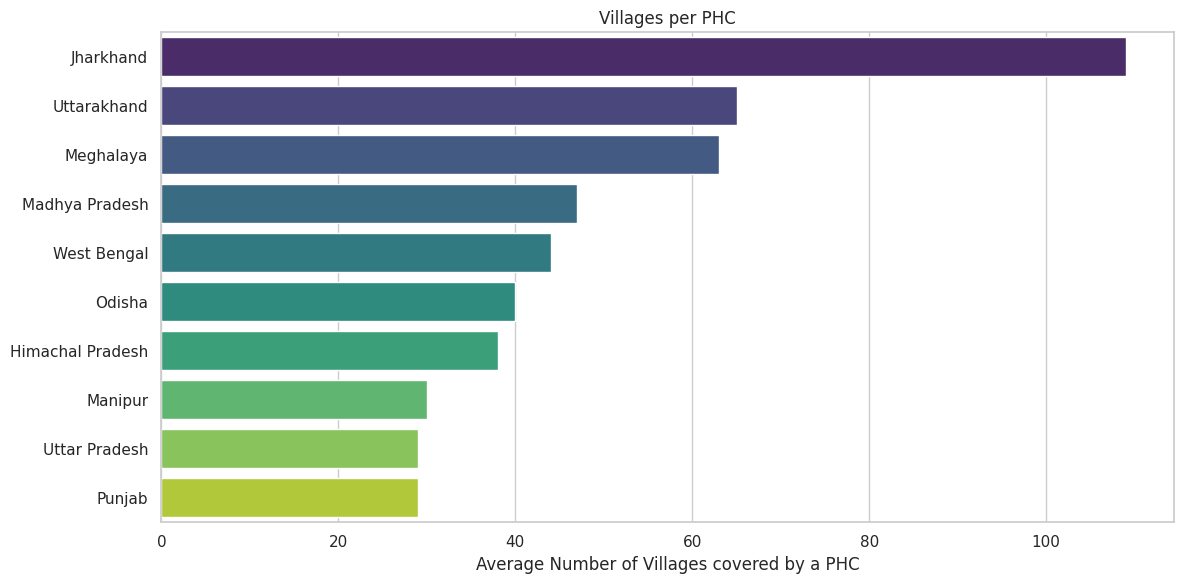

In [ ]:
# barplot
print("Service & Role-Based Segmentation")
barplot(analysis_df, "State/ UT", "Number of PHCs per CHC", "Top States by PHCs per CHC")
barplot(analysis_df, "State/ UT", "Average Number of Villages covered by a PHC", "Villages per PHC")


## **3. Resource & Economic Segmentation**

In [ ]:
analysis_df["Pop_per_km2_SC"] = analysis_df["Average Rural Population [Census 2011] covered by a Sub Centre"] / analysis_df["Average Rural Area [Sq. Km.] covered by a sub Centre"]
resource_cols = [
    "State/ UT",
    "Pop_per_km2_SC",
    "Average Rural Area [Sq. Km.] covered by a sub Centre",
    "Average Rural Population [Census 2011] covered by a Sub Centre"
]
print("\n--- Resource & Economic Segmentation ---")
print(analysis_df[resource_cols].sort_values(by="Pop_per_km2_SC", ascending=False).head())


--- Resource & Economic Segmentation ---
      State/ UT  Pop_per_km2_SC  \
28       Punjab     8280.281690   
6    Chandigarh     6557.692308   
27   Puducherry     1820.522388   
19  Lakshadweep     1741.379310   
5         Bihar     1005.525460   

    Average Rural Area [Sq. Km.] covered by a sub Centre  \
28                                               0.71      
6                                                0.26      
27                                               2.68      
19                                               0.58      
5                                                9.23      

    Average Rural Population [Census 2011] covered by a Sub Centre  
28                                               5879               
6                                                1705               
27                                               4879               
19                                               1010               
5                                        

Resource & Economic Segmentation


<ipython-input-24-0f401f7f8a2b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_col, y=x_col, data=data_sorted, palette="viridis")


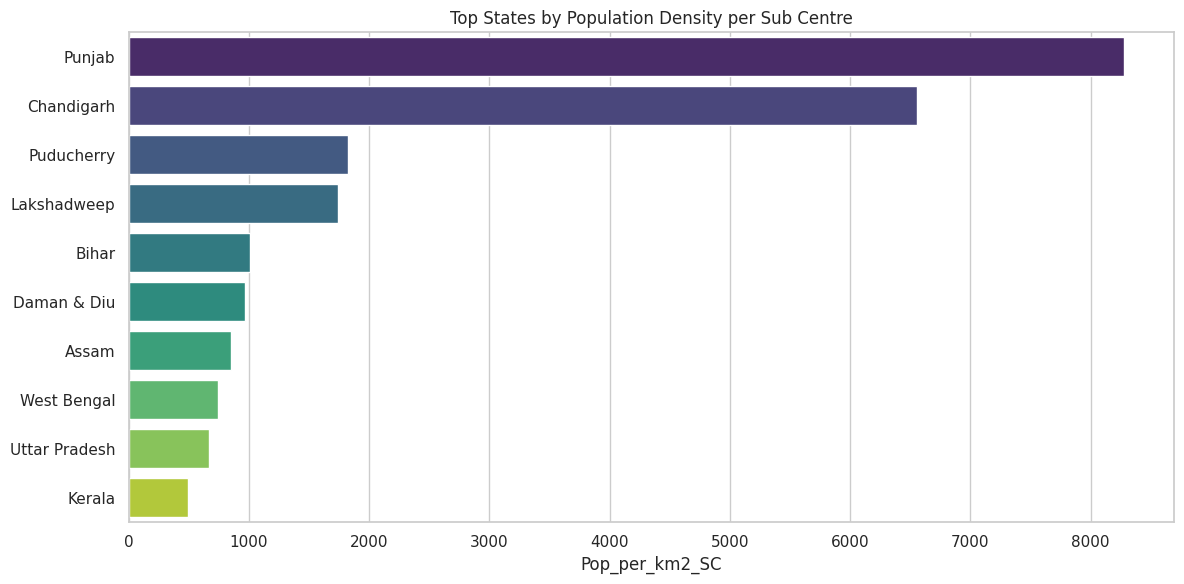

In [ ]:
# barplot
analysis_df["Pop_per_km2_SC"] = analysis_df["Average Rural Population [Census 2011] covered by a Sub Centre"] / analysis_df["Average Rural Area [Sq. Km.] covered by a sub Centre"]
print("Resource & Economic Segmentation")
barplot(analysis_df, "State/ UT", "Pop_per_km2_SC", "Top States by Population Density per Sub Centre")


## **4. Behavioral & Technology Adoption Segmentation**

In [ ]:
behavioral_cols = [
    "State/ UT",
    "Average Radial Distance [Kms] covered by a sub Centre",
    "Average Radial Distance [Kms] covered by a PHC",
    "Average Radial Distance [Kms] covered by a CHC"
]
print("\n--- Behavioral & Technology Adoption Segmentation ---")
print(analysis_df[behavioral_cols].sort_values(by="Average Radial Distance [Kms] covered by a CHC", ascending=False).head())



--- Behavioral & Technology Adoption Segmentation ---
          State/ UT  Average Radial Distance [Kms] covered by a sub Centre  \
30           Sikkim                                               3.51       
15  Jammu & Kashmir                                               4.87       
24          Mizoram                                               4.26       
22          Manipur                                               4.09       
20   Madhya Pradesh                                               3.23       

    Average Radial Distance [Kms] covered by a PHC  \
30                                            8.68   
15                                           10.51   
24                                           10.85   
22                                            9.11   
20                                            9.05   

    Average Radial Distance [Kms] covered by a CHC  
30                                           30.05  
15                                           

Behavioral & Technology Adoption Segmentation


<ipython-input-24-0f401f7f8a2b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_col, y=x_col, data=data_sorted, palette="viridis")


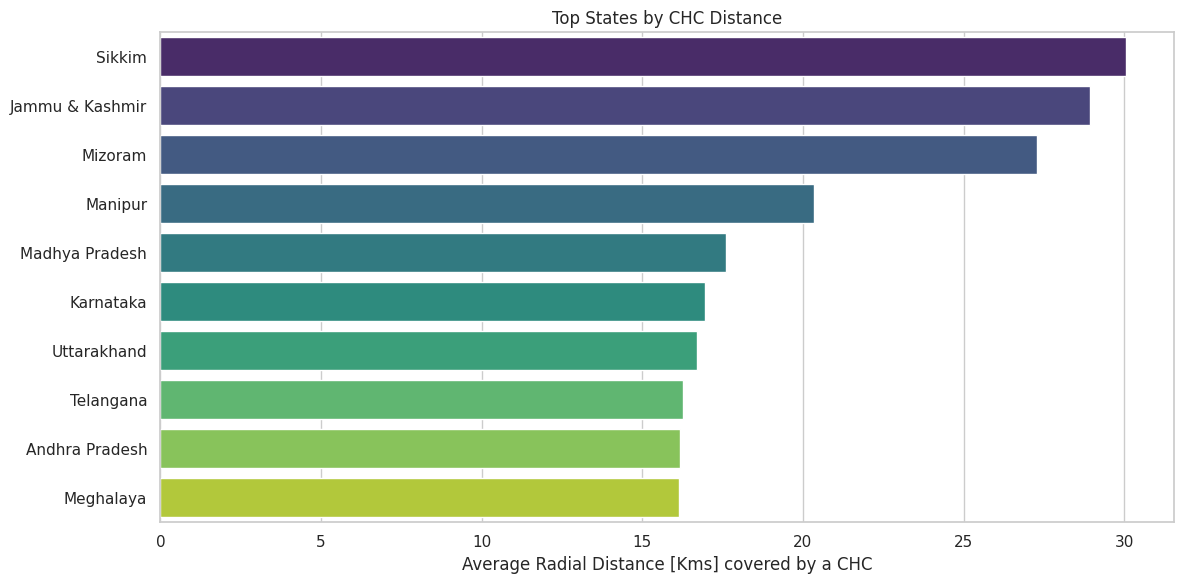

In [ ]:
# barplot
print("Behavioral & Technology Adoption Segmentation")
barplot(analysis_df, "State/ UT", "Average Radial Distance [Kms] covered by a CHC", "Top States by CHC Distance")


## **5. Service Delivery & Public Health Impact**

In [ ]:
impact_cols = [
    "State/ UT",
    "Average Rural Population [Census 2011] covered by a CHC",
    "Average Radial Distance [Kms] covered by a CHC",
    "Cluster"
]
print("\n--- Service Delivery & Public Health Impact ---")
print(analysis_df[impact_cols].sort_values(by="Average Rural Population [Census 2011] covered by a CHC", ascending=False).head())


--- Service Delivery & Public Health Impact ---
        State/ UT  Average Rural Population [Census 2011] covered by a CHC  \
5           Bihar                                           615610.0         
30         Sikkim                                           228500.0         
32      Telangana                                           189345.0         
34  Uttar Pradesh                                           188950.0         
17      Karnataka                                           181890.0         

    Average Radial Distance [Kms] covered by a CHC  Cluster  
5                                            13.96        1  
30                                           30.05        0  
32                                           16.28        1  
34                                            9.50        1  
17                                           16.95        1  


Service Delivery & Public Health Impact


<ipython-input-24-0f401f7f8a2b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_col, y=x_col, data=data_sorted, palette="viridis")


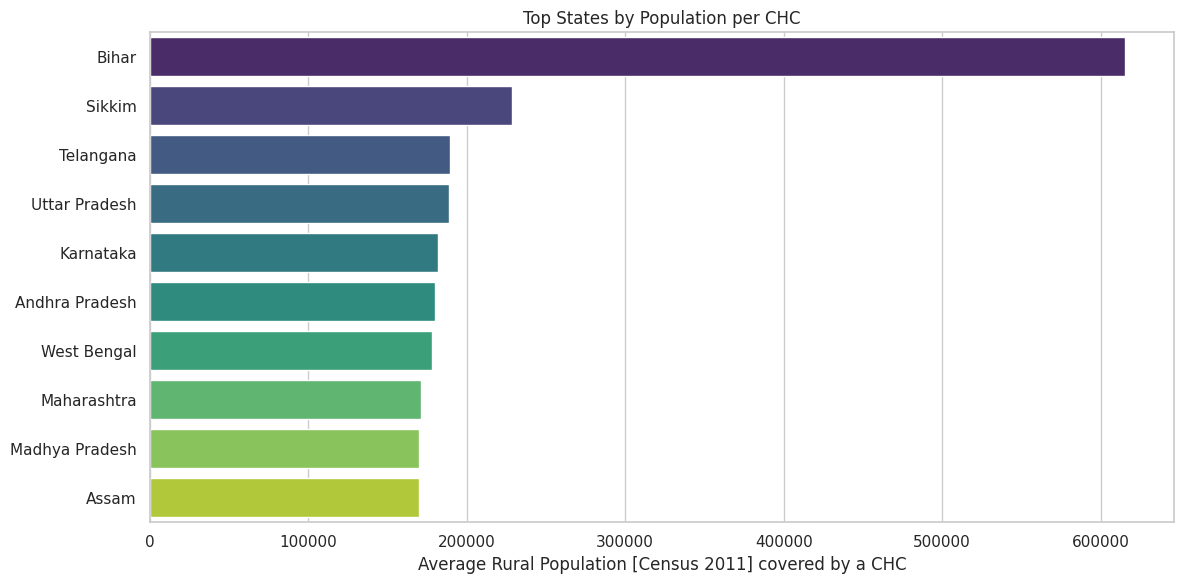

In [ ]:
# barplot
print("Service Delivery & Public Health Impact")
barplot(analysis_df, "State/ UT", "Average Rural Population [Census 2011] covered by a CHC", "Top States by Population per CHC")

# **Step 4 : K-means Clustering**

In [ ]:
# Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

In [ ]:
# K-means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
analysis_df['Cluster'] = clusters

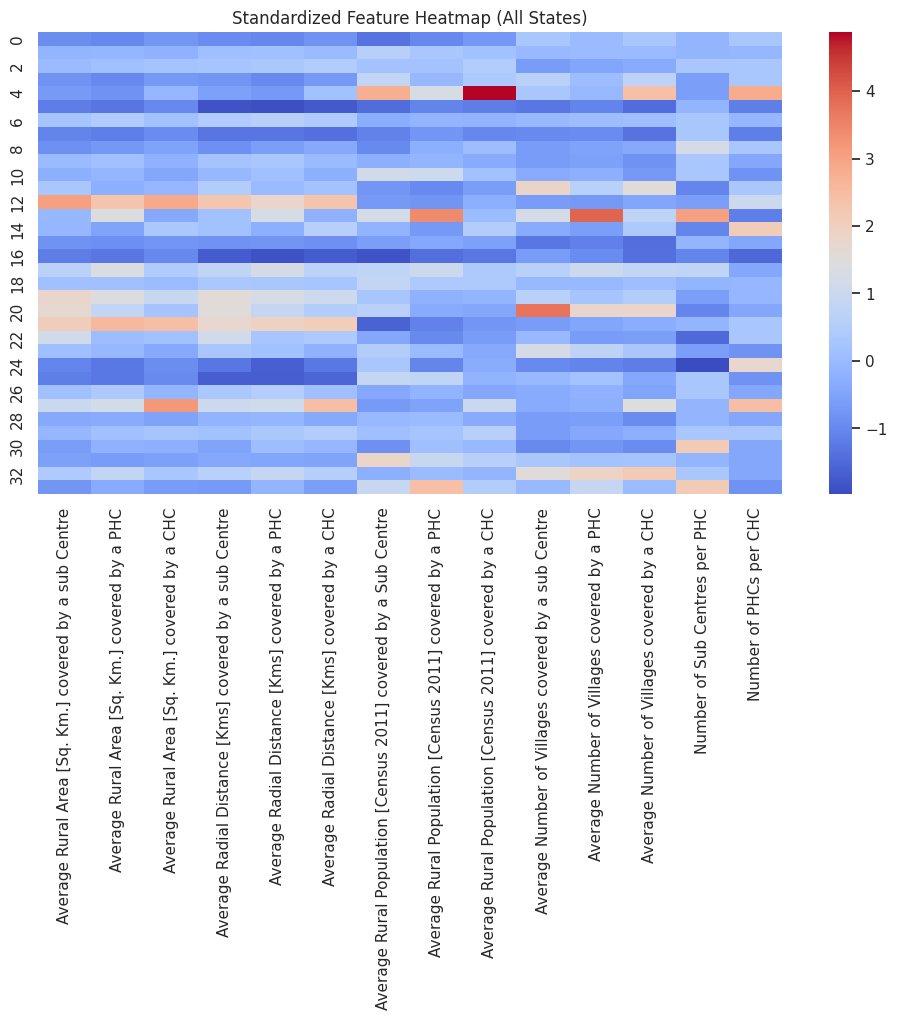

In [ ]:
# Plot Cluster Heatmap ---
plt.figure(figsize=(12, 6))
sns.heatmap(pd.DataFrame(X_scaled, columns=features.columns), cmap='coolwarm', cbar=True)
plt.title("Standardized Feature Heatmap (All States)")
plt.show()

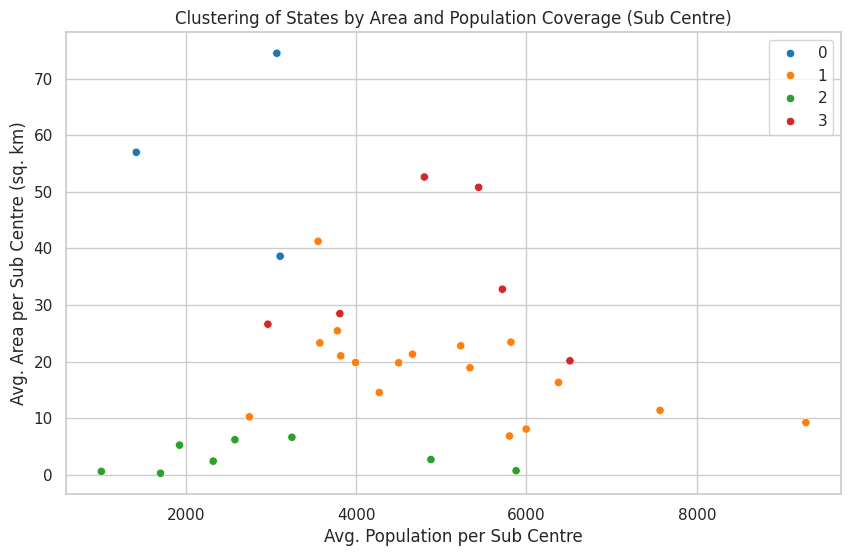

In [ ]:
# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=features['Average Rural Population [Census 2011] covered by a Sub Centre'],
    y=features['Average Rural Area [Sq. Km.] covered by a sub Centre'],
    hue=clusters,
    palette='tab10'
)
plt.title("Clustering of States by Area and Population Coverage (Sub Centre)")
plt.xlabel("Avg. Population per Sub Centre")
plt.ylabel("Avg. Area per Sub Centre (sq. km)")
plt.grid(True)
plt.show()

In [ ]:
# Optional: View Cluster Assignments
print(analysis_df[['State/ UT', 'Cluster']].sort_values(by='Cluster'))

           State/ UT  Cluster
15   Jammu & Kashmir        0
24           Mizoram        0
30            Sikkim        0
1          All India        1
7       Chhattisgarh        1
17         Karnataka        1
4              Assam        1
2     Andhra Pradesh        1
13           Haryana        1
29         Rajasthan        1
32         Telangana        1
31        Tamil Nadu        1
21       Maharashtra        1
25          Nagaland        1
12           Gujarat        1
5              Bihar        1
33           Tripura        1
34     Uttar Pradesh        1
26            Odisha        1
36       West Bengal        1
6         Chandigarh        2
0       A & N Island        2
9        Daman & Diu        2
11               Goa        2
28            Punjab        2
19       Lakshadweep        2
27        Puducherry        2
18            Kerala        2
16         Jharkhand        3
23         Meghalaya        3
20    Madhya Pradesh        3
14  Himachal Pradesh        3
22        

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
# --- Plot 1: Bubble chart (Area vs Population) ---
fig1 = px.scatter(
    analysis_df,
    x='Average Rural Area [Sq. Km.] covered by a sub Centre',
    y='Average Rural Population [Census 2011] covered by a Sub Centre',
    size='Average Number of Villages covered by a sub Centre',
    color='Cluster',
    hover_name='State/ UT',
    title='Healthcare Coverage per Sub Centre by State',
    labels={
        'Average Rural Area [Sq. Km.] covered by a sub Centre': 'Area (sq km)',
        'Average Rural Population [Census 2011] covered by a Sub Centre': 'Population'
    }
)
fig1.show()

In [ ]:
# --- Plot 2: Parallel Coordinates Plot ---
fig3 = px.parallel_coordinates(
    analysis_df,
    color='Cluster',
    dimensions=[
        'Average Rural Area [Sq. Km.] covered by a sub Centre',
        'Average Rural Population [Census 2011] covered by a Sub Centre',
        'Average Number of Villages covered by a sub Centre',
        'Number of Sub Centres per PHC',
        'Number of PHCs per CHC'
    ],
    labels={col: col.split('[')[0].strip() for col in analysis_df.columns if '[' in col},
    title='Parallel Coordinates Plot of Healthcare Metrics'
)
fig3.show()